In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, f1_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [14]:
tqdm.pandas()
df = pd.read_csv("./yelp_reviews.csv")
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [ ]:
# Ignore 3 star reviews for neutral sentiments
df = df[df['stars'] != 3]
df['label'] = (df['stars'] >= 4).astype(int)
df.drop(columns='stars', inplace=True)

#Split of 80/10/10 for train, val and test
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
n_total = int(0.0158774 * len(df))
n_train = int(0.8 * n_total)
n_val = int(0.1 * n_total)

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:n_train + 2*n_val]

print("Vectorizing text with TfidfVectorizer...")

#Initialization of TfidVectorizer for reviews
vectorizer = TfidfVectorizer(
    stop_words='english',
    lowercase=True
)

# X, y text and labels transform process with vectorizer 
X_train = vectorizer.fit_transform(tqdm(df_train['text'], desc="Fitting TF-IDF"))
X_val = vectorizer.transform(tqdm(df_val['text'], desc="Transforming validation"))
X_test = vectorizer.transform(tqdm(df_test['text'], desc="Transforming test"))

y_train = df_train['label'].values
y_val = df_val['label'].values
y_test = df_test['label'].values

svm = LinearSVC(
        C = 0.38, # Testing different C Parameters
        dual=False
        )
svm.fit(X_train, y_train)

print("Classification Report on Validation Set:")
print(classification_report(y_val, svm.predict(X_val)))
print("\n")
print("Classification Report on Test Set:")
print(classification_report(y_test, svm.predict(X_test)))

C:\Users\OMGEp\AppData\Local\Temp\ipykernel_18552\2000790186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = (df['stars'] >= 4).astype(int)
C:\Users\OMGEp\AppData\Local\Temp\ipykernel_18552\2000790186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='stars', inplace=True)


100001
80000
10000
Vectorizing text with TfidfVectorizer...


Transforming test: 100%|██████████| 10000/10000 [00:00<00:00, 18228.39it/s]


Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      2472
           1       0.96      0.97      0.97      7528

    accuracy                           0.95     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.95      0.95      0.95     10000



Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2554
           1       0.96      0.97      0.97      7446

    accuracy                           0.95     10000
   macro avg       0.94      0.93      0.94     10000
weighted avg       0.95      0.95      0.95     10000



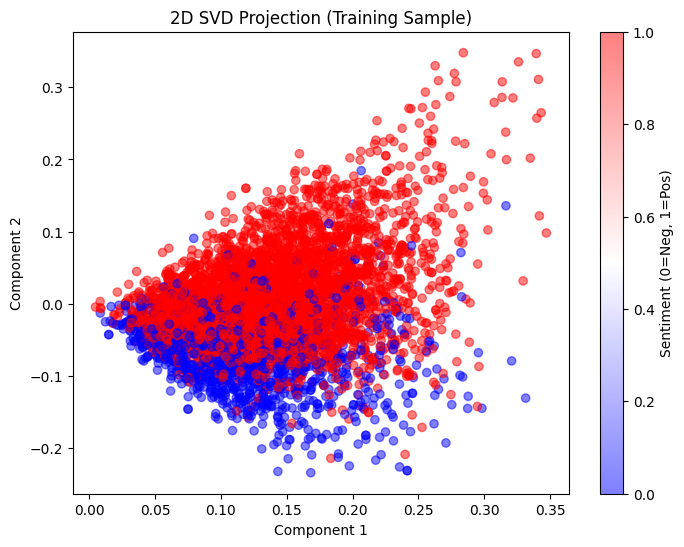

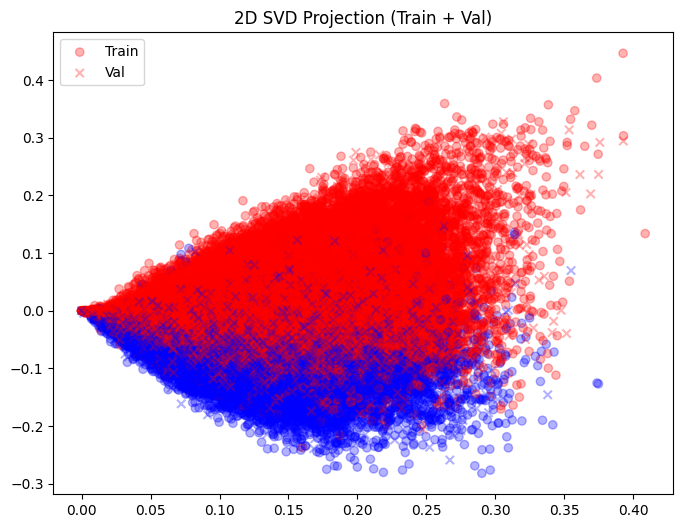

In [16]:
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Sample 5000 training examples
X_sample, y_sample = resample(X_train, y_train, n_samples=5000, random_state=42)

svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_sample)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample, cmap='bwr', alpha=0.5)
plt.title("2D SVD Projection (Training Sample)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Sentiment (0=Neg, 1=Pos)")
plt.show()

svd = TruncatedSVD(n_components=2, random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_val_reduced = svd.transform(X_val)
X_test_reduced = svd.transform(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='bwr', alpha=0.3, label="Train")
plt.scatter(X_val_reduced[:, 0], X_val_reduced[:, 1], c=y_val, cmap='bwr', alpha=0.3, marker='x', label="Val")
plt.title("2D SVD Projection (Train + Val)")
plt.legend()
plt.show()



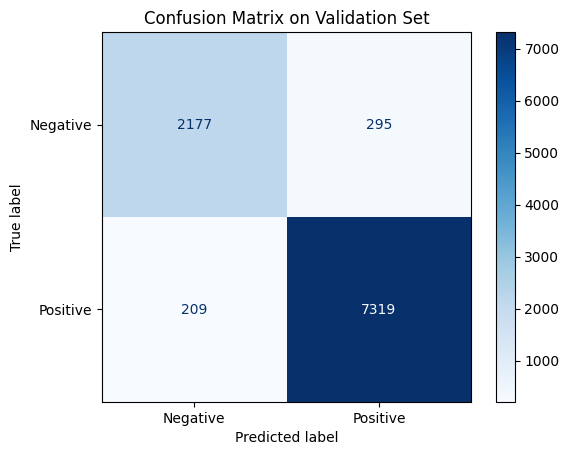

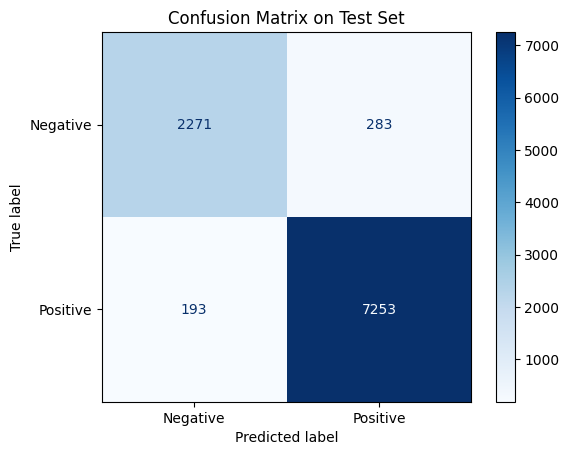

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# On validation set
ConfusionMatrixDisplay.from_estimator(
    svm, X_val, y_val,
    display_labels=['Negative', 'Positive'],
    cmap='Blues',
    values_format='d'
)
plt.title("Confusion Matrix on Validation Set")
plt.show()

# On test set
ConfusionMatrixDisplay.from_estimator(
    svm, X_test, y_test,
    display_labels=['Negative', 'Positive'],
    cmap='Blues',
    values_format='d'
)
plt.title("Confusion Matrix on Test Set")
plt.show()

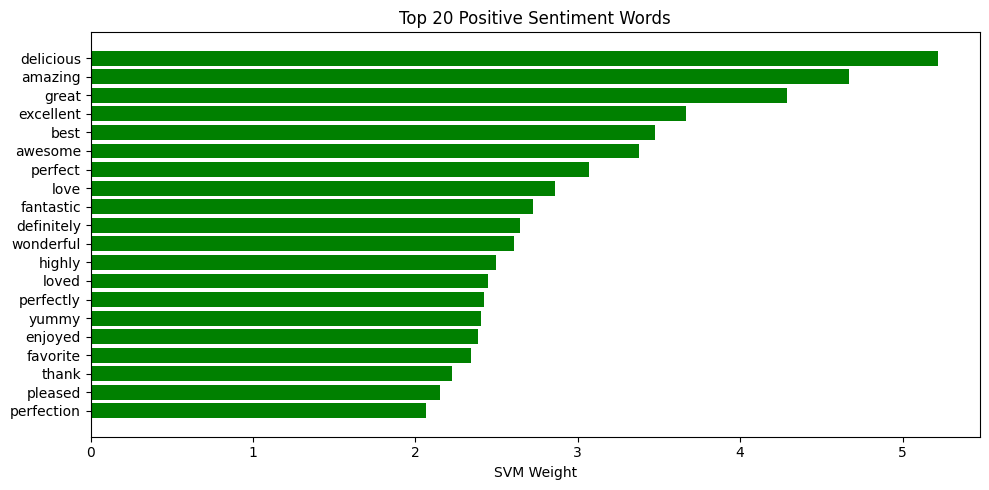

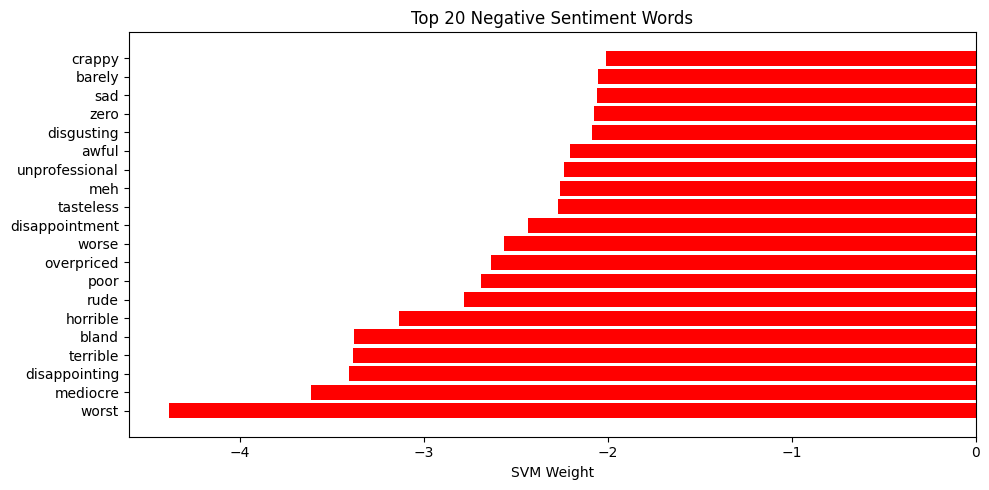

In [18]:
# Get feature names and SVM weights
feature_names = vectorizer.get_feature_names_out()
coefficients = svm.coef_.flatten()

# Top 20 positive and negative words
top_pos_indices = np.argsort(coefficients)[-20:]
top_neg_indices = np.argsort(coefficients)[:20]

top_pos_words = feature_names[top_pos_indices]
top_neg_words = feature_names[top_neg_indices]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_pos_words, coefficients[top_pos_indices], color='green')
plt.title("Top 20 Positive Sentiment Words")
plt.xlabel("SVM Weight")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_neg_words, coefficients[top_neg_indices], color='red')
plt.title("Top 20 Negative Sentiment Words")
plt.xlabel("SVM Weight")
plt.tight_layout()
plt.show()